# Primary Reguirements

In [0]:
import os 
import sys
import random
import json
import zipfile
from zipfile import ZipFile
 
print("[INFO]: Imported primary library")

print("[INFO]: Extracting dataset from zip file ...")
file_name = '/content/drive/My Drive/kaggle/tomato_dataset1/tomato.zip'
 
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("[INFO]: Extracted dataset zip file")
  
 #Import tensorflow and keras library
import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing import image
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
import keras
from tensorflow.keras import regularizers
from tensorflow.keras import activations
#from keras.layers.normalization import LayerNormalization
#from tf.keras.layers import LayerNormalization
from keras import layers
from keras.optimizers import SGD
from keras.callbacks import CSVLogger


print("[INFO]: Tensorflow version{}".format(tf.__version__))
state_gpu = tf.test.gpu_device_name()
print("[INFO]: GPU usage{0}".format(state_gpu))

# ImageDataGenerator and get train data and validation data
TRAINING_DIR = '/content/New Plant Diseases Dataset(Augmented)/train/' 
VALIDATION_DIR = '/content/New Plant Diseases Dataset(Augmented)/valid/'

# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(rescale = 1./255)
valid_gen = ImageDataGenerator(rescale = 1./255)

TARGET_SIZE = (227,227)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42
 
#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)
 
valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

[INFO]: Imported primary library
[INFO]: Extracting dataset from zip file ...
[INFO]: Extracted dataset zip file


Using TensorFlow backend.


[INFO]: Tensorflow version2.2.0
[INFO]: GPU usage/device:GPU:0
Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Baseline

In [0]:
import os 
import sys
import random
import json
import zipfile
from zipfile import ZipFile
 
print("[INFO]: Imported primary library")

[INFO]: Imported primary library


In [0]:
print("[INFO]: Extracting dataset from zip file ...")
file_name = '/content/drive/My Drive/kaggle/tomato_dataset1/tomato.zip'
 
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("[INFO]: Extracted dataset zip file")

[INFO]: Extracting dataset from zip file ...
[INFO]: Extracted dataset zip file


In [0]:
#Import tensorflow and keras library
import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing import image
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
import keras
from tensorflow.keras import regularizers
from tensorflow.keras import activations
#from keras.layers.normalization import LayerNormalization
#from tf.keras.layers import LayerNormalization
from keras import layers
 
print("[INFO]: Tensorflow version{}".format(tf.__version__))
state_gpu = tf.test.gpu_device_name()
print("[INFO]: GPU usage{0}".format(state_gpu))

Using TensorFlow backend.


[INFO]: Tensorflow version2.2.0
[INFO]: GPU usage/device:GPU:0


In [0]:
# ImageDataGenerator and get train data and validation data
TRAINING_DIR = '/content/New Plant Diseases Dataset(Augmented)/train/' 
VALIDATION_DIR = '/content/New Plant Diseases Dataset(Augmented)/valid/'

In [0]:
# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(rescale = 1./255)
valid_gen = ImageDataGenerator(rescale = 1./255)

In [0]:
TARGET_SIZE = (227,227)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42
 
#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)
 
valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [0]:
#Show class indis and class name
for cl_indis, cl_name in enumerate(train_data.class_indices):
     print(cl_indis, cl_name)

0 Tomato___Bacterial_spot
1 Tomato___Early_blight
2 Tomato___Late_blight
3 Tomato___Leaf_Mold
4 Tomato___Septoria_leaf_spot
5 Tomato___Spider_mites Two-spotted_spider_mite
6 Tomato___Target_Spot
7 Tomato___Tomato_Yellow_Leaf_Curl_Virus
8 Tomato___Tomato_mosaic_virus
9 Tomato___healthy


In [0]:
# Base Model
 
# Initializing the CNN based AlexNet
model = Sequential()
 
#valid:zero padding, same:keep same dimensionality by add padding
 
# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), activation = 'relu'))
 
# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))
 
# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', activation = 'relu'))
 
# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))
 
 
# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu'))
 
# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu'))
 
 
# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', activation = 'relu'))
 
# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))
 
# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())
 
# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu'))
 
# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu'))
 
# 3rd Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))
 
 
print("[INFO]: Model Summary")
 
model.summary()

[INFO]: Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (No

In [0]:
from keras.optimizers import SGD
 
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9
 
# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.callbacks import CSVLogger
 
#Log callback
filepath="baseline.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 49s 340ms/step - loss: 2.2921 - accuracy: 0.1068 - val_loss: 2.3012 - val_accuracy: 0.1510
Epoch 2/25
143/143 [==============================] - 44s 307ms/step - loss: 2.2170 - accuracy: 0.2088 - val_loss: 2.0616 - val_accuracy: 0.3086
Epoch 3/25
143/143 [==============================] - 44s 307ms/step - loss: 1.7459 - accuracy: 0.3840 - val_loss: 1.3832 - val_accuracy: 0.4448
Epoch 4/25
143/143 [==============================] - 44s 305ms/step - loss: 1.3198 - accuracy: 0.5398 - val_loss: 1.2531 - val_accuracy: 0.5834
Epoch 5/25
143/143 [==============================] - 44s 304ms/step - loss: 1.1021 - accuracy: 0.6220 - val_loss: 1.1045 - val_accuracy: 0.6646
Epoch 6/25
143/143 [==============================] - 43s 304ms/step - loss: 0.9348 - accuracy: 0.6822 - val_loss: 1.0614 - val_accuracy: 0.6339
Epoch 7/25
143/143 [==============================] - 43s 301ms/step - loss: 0.8323 - accuracy: 0.7164 - val_loss: 0.7480 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 92.94970631599426


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


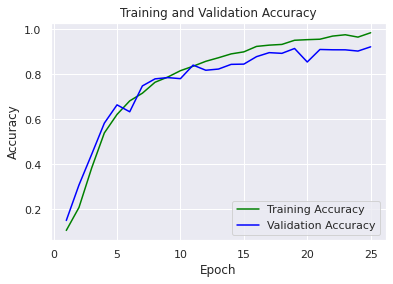

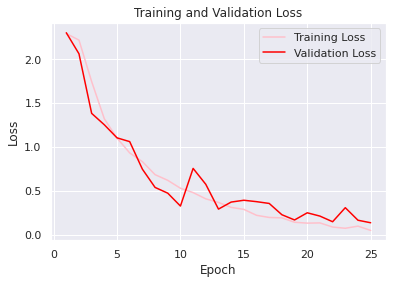

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# BASELINE MODEL - He-Uniform Initilizer

In [0]:
# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))


# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))


# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='he_uniform'))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='he_uniform'))

# 3td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))


print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_10 (Conv2D)           (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Log callback
filepath="he-uniform.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 44s 311ms/step - loss: 1.6072 - accuracy: 0.4560 - val_loss: 0.8805 - val_accuracy: 0.6305
Epoch 2/25
143/143 [==============================] - 44s 309ms/step - loss: 0.8470 - accuracy: 0.7106 - val_loss: 0.7311 - val_accuracy: 0.7112
Epoch 3/25
143/143 [==============================] - 44s 306ms/step - loss: 0.6100 - accuracy: 0.7918 - val_loss: 0.3323 - val_accuracy: 0.8091
Epoch 4/25
143/143 [==============================] - 43s 303ms/step - loss: 0.4816 - accuracy: 0.8339 - val_loss: 0.3649 - val_accuracy: 0.8390
Epoch 5/25
143/143 [==============================] - 43s 301ms/step - loss: 0.3683 - accuracy: 0.8753 - val_loss: 0.5082 - val_accuracy: 0.8397
Epoch 6/25
143/143 [==============================] - 43s 298ms/step - loss: 0.3385 - accuracy: 0.8812 - val_loss: 0.3539 - val_accuracy: 0.8821
Epoch 7/25
143/143 [==============================] - 43s 298ms/step - loss: 0.2611 - accuracy: 0.9076 - val_loss: 0.4845 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 95.16801834106445


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


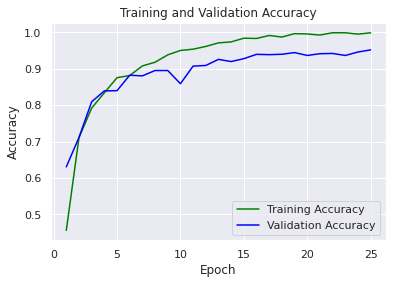

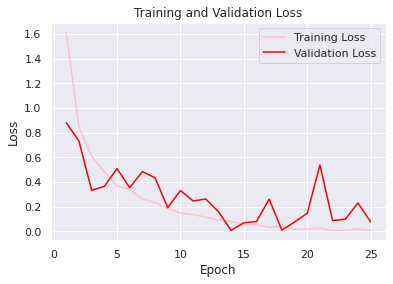

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# BASELINE MODEL + He uniform + 1000 dense

In [0]:
# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))


# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))


# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='he_uniform'))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='he_uniform'))

# 3rd Fully Connected Layer
model.add(Dense(units = 1000, activation = 'relu', kernel_initializer='he_uniform'))

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))


print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_15 (Conv2D)           (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="1000dense.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 45s 313ms/step - loss: 1.4731 - accuracy: 0.4937 - val_loss: 0.7750 - val_accuracy: 0.6871
Epoch 2/25
143/143 [==============================] - 44s 310ms/step - loss: 0.7875 - accuracy: 0.7287 - val_loss: 0.8258 - val_accuracy: 0.7274
Epoch 3/25
143/143 [==============================] - 44s 309ms/step - loss: 0.5691 - accuracy: 0.7999 - val_loss: 0.4657 - val_accuracy: 0.8175
Epoch 4/25
143/143 [==============================] - 44s 309ms/step - loss: 0.4817 - accuracy: 0.8313 - val_loss: 0.6580 - val_accuracy: 0.7935
Epoch 5/25
143/143 [==============================] - 44s 307ms/step - loss: 0.3691 - accuracy: 0.8722 - val_loss: 0.5972 - val_accuracy: 0.8691
Epoch 6/25
143/143 [==============================] - 43s 304ms/step - loss: 0.3200 - accuracy: 0.8892 - val_loss: 0.4382 - val_accuracy: 0.8825
Epoch 7/25
143/143 [==============================] - 43s 299ms/step - loss: 0.2411 - accuracy: 0.9166 - val_loss: 0.1888 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 95.32176852226257


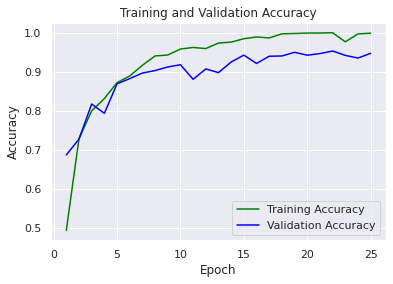

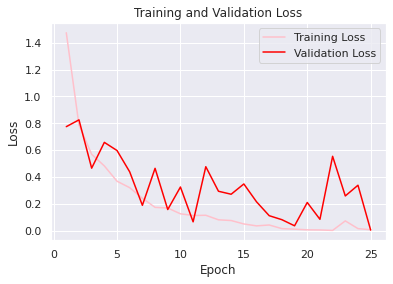

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# BASELINE MODEL + He uniform + 1000 dense + Decide Opt


In [0]:
# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))


# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))


# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='he_uniform'))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='he_uniform'))

# 3rd Fully Connected Layer
model.add(Dense(units = 1000, activation = 'relu', kernel_initializer='he_uniform'))

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))


print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_20 (Conv2D)           (No

In [0]:

LEARNING_RATE = 0.001
MOMENTUM = 0.9

from keras.optimizers import Adam
import keras
opt = Adam(lr=LEARNING_RATE)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

#Log callback
filepath="1000dense.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 46s 323ms/step - loss: 3.3942 - accuracy: 0.1709 - val_loss: 1.6632 - val_accuracy: 0.3588
Epoch 2/25
143/143 [==============================] - 46s 320ms/step - loss: 1.2921 - accuracy: 0.5303 - val_loss: 0.5056 - val_accuracy: 0.7156
Epoch 3/25
143/143 [==============================] - 46s 319ms/step - loss: 0.7057 - accuracy: 0.7507 - val_loss: 0.6873 - val_accuracy: 0.8036
Epoch 4/25
143/143 [==============================] - 45s 315ms/step - loss: 0.5398 - accuracy: 0.8096 - val_loss: 0.6484 - val_accuracy: 0.8078
Epoch 5/25
143/143 [==============================] - 45s 313ms/step - loss: 0.4005 - accuracy: 0.8579 - val_loss: 0.8640 - val_accuracy: 0.8408
Epoch 6/25
143/143 [==============================] - 45s 313ms/step - loss: 0.3318 - accuracy: 0.8830 - val_loss: 0.4231 - val_accuracy: 0.8590
Epoch 7/25
143/143 [==============================] - 45s 313ms/step - loss: 0.2928 - accuracy: 0.8967 - val_loss: 0.6670 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 92.07116365432739


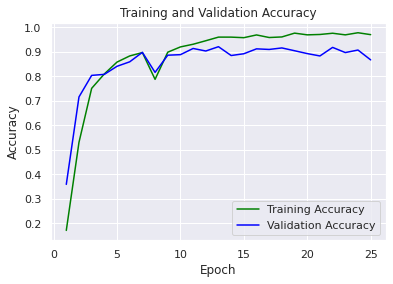

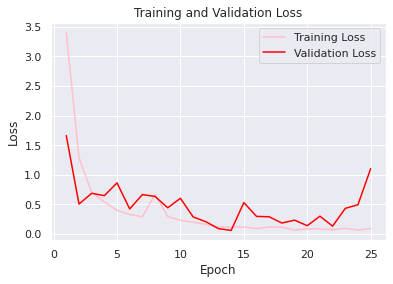

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Decide learning rate

In [0]:
# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))


# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))


# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='he_uniform'))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='he_uniform'))

# 3rd Fully Connected Layer
model.add(Dense(units = 1000, activation = 'relu', kernel_initializer='he_uniform'))

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))


print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_25 (Conv2D)           (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.01
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="lr.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 43s 302ms/step - loss: 2.2518 - accuracy: 0.1789 - val_loss: 2.2354 - val_accuracy: 0.1844
Epoch 2/25
143/143 [==============================] - 43s 303ms/step - loss: 2.0413 - accuracy: 0.2567 - val_loss: 1.8378 - val_accuracy: 0.4487
Epoch 3/25
143/143 [==============================] - 43s 299ms/step - loss: 1.9270 - accuracy: 0.3280 - val_loss: 1.6398 - val_accuracy: 0.4006
Epoch 4/25
143/143 [==============================] - 43s 298ms/step - loss: 1.3222 - accuracy: 0.5349 - val_loss: 0.9255 - val_accuracy: 0.5866
Epoch 5/25
143/143 [==============================] - 42s 296ms/step - loss: 0.9460 - accuracy: 0.6606 - val_loss: 1.1865 - val_accuracy: 0.6582
Epoch 6/25
143/143 [==============================] - 42s 295ms/step - loss: 0.6978 - accuracy: 0.7480 - val_loss: 0.4035 - val_accuracy: 0.7114
Epoch 7/25
143/143 [==============================] - 42s 297ms/step - loss: 0.5850 - accuracy: 0.7912 - val_loss: 0.4988 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 91.60992503166199


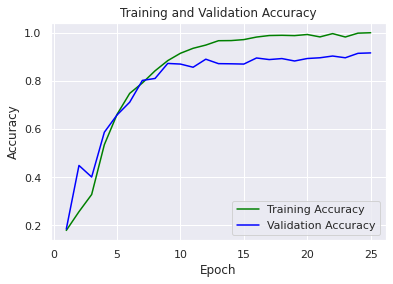

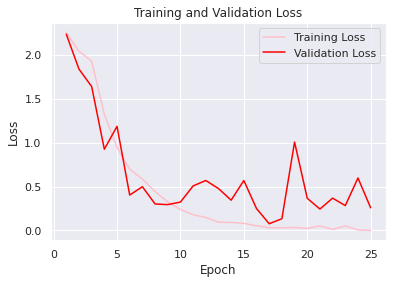

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Data Augmentation

In [0]:
# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(
rescale = 1./255,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

#train_gen = ImageDataGenerator(rescale = 1./255)
valid_gen = ImageDataGenerator(rescale = 1./255)

In [0]:
TARGET_SIZE = (227,227)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42

#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)

valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [0]:
# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))


# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))


# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', activation = 'relu', kernel_initializer='he_uniform'))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='he_uniform'))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='he_uniform'))

# 3rd Fully Connected Layer
model.add(Dense(units = 1000, activation = 'relu', kernel_initializer='he_uniform'))

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))


print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_30 (Conv2D)           (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="data_aug.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 203s 1s/step - loss: 2.0321 - accuracy: 0.2835 - val_loss: 1.5962 - val_accuracy: 0.4740
Epoch 2/25
143/143 [==============================] - 201s 1s/step - loss: 1.4005 - accuracy: 0.5185 - val_loss: 1.4435 - val_accuracy: 0.5118
Epoch 3/25
143/143 [==============================] - 200s 1s/step - loss: 1.0145 - accuracy: 0.6484 - val_loss: 0.5346 - val_accuracy: 0.7345
Epoch 4/25
143/143 [==============================] - 198s 1s/step - loss: 0.8270 - accuracy: 0.7152 - val_loss: 0.6832 - val_accuracy: 0.7718
Epoch 5/25
143/143 [==============================] - 198s 1s/step - loss: 0.7031 - accuracy: 0.7548 - val_loss: 0.8071 - val_accuracy: 0.7779
Epoch 6/25
143/143 [==============================] - 197s 1s/step - loss: 0.6236 - accuracy: 0.7806 - val_loss: 1.2939 - val_accuracy: 0.7402
Epoch 7/25
143/143 [==============================] - 197s 1s/step - loss: 0.5345 - accuracy: 0.8139 - val_loss: 0.6416 - val_accuracy: 0.7468

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)


[INFO] Best Validation Accuracy: % 93.36701035499573


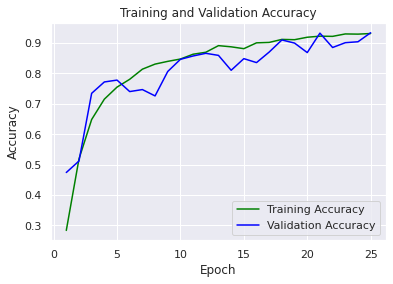

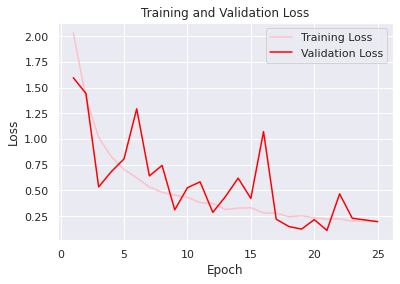

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Dropout 0.5


In [0]:
# this is the augmentation configuration we will use for training

train_gen = ImageDataGenerator(rescale = 1./255)
valid_gen = ImageDataGenerator(rescale = 1./255)

In [0]:
TARGET_SIZE = (227,227)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42

#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)

valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [0]:
from tensorflow.keras import regularizers
from tensorflow.keras import activations
#from keras.layers.normalization import LayerNormalization
#from tf.keras.layers import LayerNormalization
from keras import layers
# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))


# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))


# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))


# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform')) 
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.5))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.5))

# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.5))

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_9 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_10 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="dr05.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 47s 331ms/step - loss: 2.3373 - accuracy: 0.1387 - val_loss: 2.0919 - val_accuracy: 0.2083
Epoch 2/25
143/143 [==============================] - 47s 328ms/step - loss: 1.9913 - accuracy: 0.2621 - val_loss: 1.8848 - val_accuracy: 0.4261
Epoch 3/25
143/143 [==============================] - 46s 325ms/step - loss: 1.6330 - accuracy: 0.4230 - val_loss: 1.0258 - val_accuracy: 0.6271
Epoch 4/25
143/143 [==============================] - 47s 326ms/step - loss: 1.2617 - accuracy: 0.5606 - val_loss: 1.0439 - val_accuracy: 0.6442
Epoch 5/25
143/143 [==============================] - 46s 323ms/step - loss: 1.0455 - accuracy: 0.6359 - val_loss: 1.0102 - val_accuracy: 0.7224
Epoch 6/25
143/143 [==============================] - 46s 321ms/step - loss: 0.8658 - accuracy: 0.6996 - val_loss: 0.9366 - val_accuracy: 0.7224
Epoch 7/25
143/143 [==============================] - 45s 317ms/step - loss: 0.7955 - accuracy: 0.7192 - val_loss: 0.7285 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 93.91610026359558


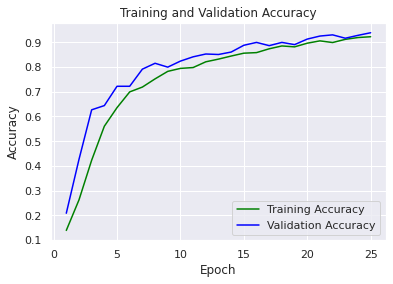

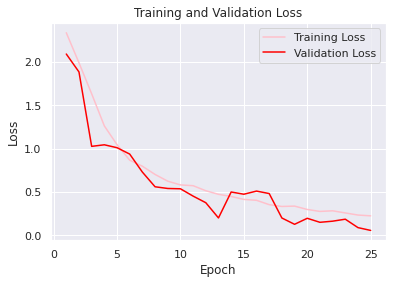

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# FC layer Dropout 0.5 + Conv layer Dropout 0.2 

In [0]:
from tensorflow.keras import regularizers
from tensorflow.keras import activations
#from keras.layers.normalization import LayerNormalization
#from tf.keras.layers import LayerNormalization
from keras import layers
# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))
model.add(Dropout(0.2))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))
model.add(Dropout(0.2))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.2))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.2))

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))
model.add(Dropout(0.2))

# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform')) 
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.5))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.5))

# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.5))

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_17 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_18 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (N

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="dr05-dr02.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 44s 307ms/step - loss: 2.5633 - accuracy: 0.1018 - val_loss: 2.2862 - val_accuracy: 0.1683
Epoch 2/25
143/143 [==============================] - 44s 307ms/step - loss: 2.2444 - accuracy: 0.1281 - val_loss: 2.2515 - val_accuracy: 0.1942
Epoch 3/25
143/143 [==============================] - 44s 308ms/step - loss: 2.1858 - accuracy: 0.1762 - val_loss: 2.2195 - val_accuracy: 0.1948
Epoch 4/25
143/143 [==============================] - 44s 305ms/step - loss: 2.1178 - accuracy: 0.1982 - val_loss: 2.0700 - val_accuracy: 0.2425
Epoch 5/25
143/143 [==============================] - 44s 307ms/step - loss: 2.0432 - accuracy: 0.2360 - val_loss: 1.9946 - val_accuracy: 0.2291
Epoch 6/25
143/143 [==============================] - 44s 307ms/step - loss: 1.9616 - accuracy: 0.2820 - val_loss: 1.9270 - val_accuracy: 0.2730
Epoch 7/25
143/143 [==============================] - 44s 306ms/step - loss: 1.8171 - accuracy: 0.3257 - val_loss: 1.6994 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 78.56358289718628


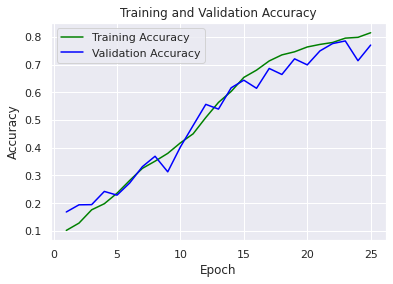

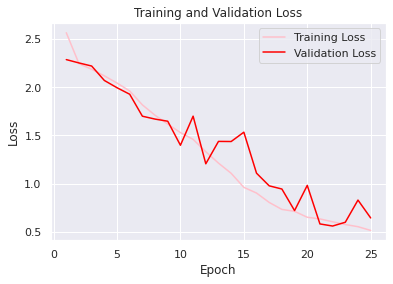

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Dropout 0.4


In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))


# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))


# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))


# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform')) 
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.4))

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_33 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_34 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (N

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="dr04.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)


Epoch 1/25
143/143 [==============================] - 43s 300ms/step - loss: 2.1927 - accuracy: 0.2028 - val_loss: 1.4863 - val_accuracy: 0.5312
Epoch 2/25
143/143 [==============================] - 43s 300ms/step - loss: 1.5714 - accuracy: 0.4532 - val_loss: 1.0327 - val_accuracy: 0.6545
Epoch 3/25
143/143 [==============================] - 43s 300ms/step - loss: 1.0973 - accuracy: 0.6239 - val_loss: 0.7574 - val_accuracy: 0.7406
Epoch 4/25
143/143 [==============================] - 43s 300ms/step - loss: 0.8999 - accuracy: 0.6864 - val_loss: 0.5730 - val_accuracy: 0.7400
Epoch 5/25
143/143 [==============================] - 43s 300ms/step - loss: 0.7261 - accuracy: 0.7444 - val_loss: 1.0102 - val_accuracy: 0.7463
Epoch 6/25
143/143 [==============================] - 43s 299ms/step - loss: 0.6776 - accuracy: 0.7614 - val_loss: 0.4704 - val_accuracy: 0.7654
Epoch 7/25
143/143 [==============================] - 43s 299ms/step - loss: 0.5861 - accuracy: 0.7956 - val_loss: 0.4381 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 94.09180879592896


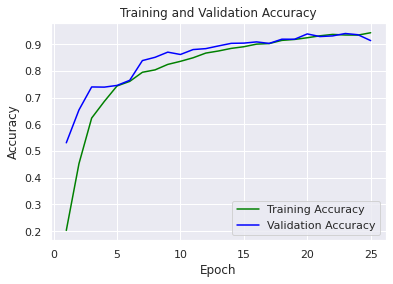

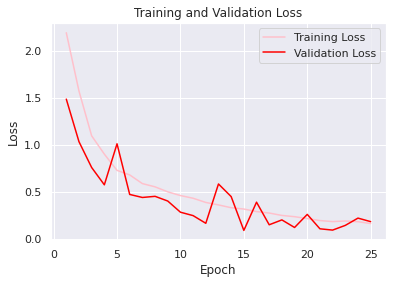

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Dropout 0.2

In [0]:
from tensorflow.keras import regularizers
from tensorflow.keras import activations
#from keras.layers.normalization import LayerNormalization
#from tf.keras.layers import LayerNormalization
from keras import layers
# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))


# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))


# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))


# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform')) 
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.2))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.2))

# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.2))

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_41 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_42 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_59 (Conv2D)           (N

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="dr02log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  


In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 43s 302ms/step - loss: 1.9296 - accuracy: 0.3169 - val_loss: 1.1987 - val_accuracy: 0.5767
Epoch 2/25
143/143 [==============================] - 43s 302ms/step - loss: 1.1343 - accuracy: 0.6127 - val_loss: 0.5644 - val_accuracy: 0.6936
Epoch 3/25
143/143 [==============================] - 43s 303ms/step - loss: 0.8256 - accuracy: 0.7187 - val_loss: 0.9937 - val_accuracy: 0.7733
Epoch 4/25
143/143 [==============================] - 43s 304ms/step - loss: 0.6666 - accuracy: 0.7712 - val_loss: 0.3369 - val_accuracy: 0.8052
Epoch 5/25
143/143 [==============================] - 44s 304ms/step - loss: 0.5581 - accuracy: 0.8079 - val_loss: 0.7633 - val_accuracy: 0.8445
Epoch 6/25
143/143 [==============================] - 44s 305ms/step - loss: 0.4814 - accuracy: 0.8303 - val_loss: 0.1690 - val_accuracy: 0.8618
Epoch 7/25
143/143 [==============================] - 43s 303ms/step - loss: 0.4232 - accuracy: 0.8529 - val_loss: 0.4716 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 94.9483871459961


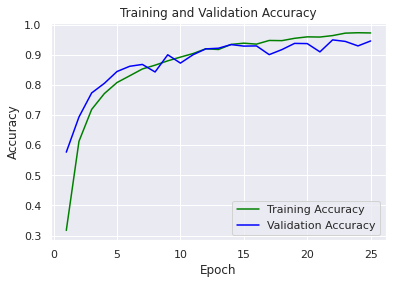

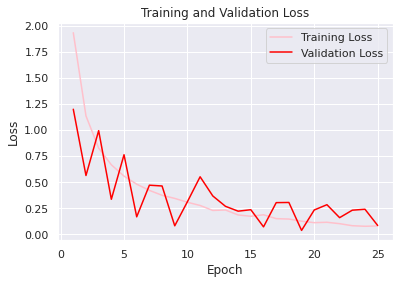

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# l2 reg 0.1

In [0]:
from tensorflow.keras import regularizers
from tensorflow.keras import activations
#from keras.layers.normalization import LayerNormalization
#from tf.keras.layers import LayerNormalization
from keras import layers
# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.1))) 
model.add(layers.Activation(activations.relu))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Activation(activations.relu))


# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.1) ))
model.add(layers.Activation(activations.relu))


# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_49 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_50 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (N

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="lr01.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 43s 303ms/step - loss: 1446.4081 - accuracy: 0.4147 - val_loss: 1066.7173 - val_accuracy: 0.5905
Epoch 2/25
143/143 [==============================] - 43s 302ms/step - loss: 810.1355 - accuracy: 0.6657 - val_loss: 595.4878 - val_accuracy: 0.6973
Epoch 3/25
143/143 [==============================] - 43s 303ms/step - loss: 452.4602 - accuracy: 0.7456 - val_loss: 332.9537 - val_accuracy: 0.7384
Epoch 4/25
143/143 [==============================] - 44s 306ms/step - loss: 252.9192 - accuracy: 0.7644 - val_loss: 186.1712 - val_accuracy: 0.7670
Epoch 5/25
143/143 [==============================] - 43s 303ms/step - loss: 141.5674 - accuracy: 0.7726 - val_loss: 104.3509 - val_accuracy: 0.7788
Epoch 6/25
143/143 [==============================] - 44s 305ms/step - loss: 79.4409 - accuracy: 0.7766 - val_loss: 58.4778 - val_accuracy: 0.7845
Epoch 7/25
143/143 [==============================] - 44s 305ms/step - loss: 44.7193 - accuracy: 0.7900 - 

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 90.37997126579285


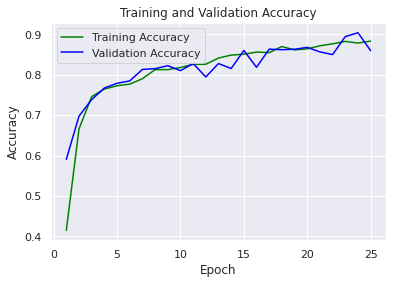

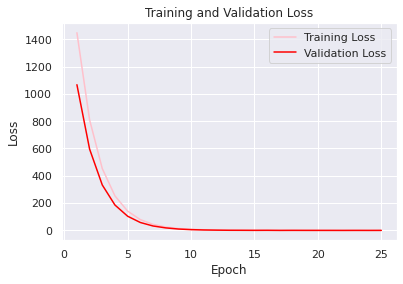

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# l2 reg 0.01

In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.01))) 
model.add(layers.Activation(activations.relu))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Activation(activations.relu))


# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.01) ))
model.add(layers.Activation(activations.relu))


# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_57 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_58 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (N

In [0]:

#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="lr001.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False) 

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 44s 310ms/step - loss: 180.8588 - accuracy: 0.4705 - val_loss: 175.4538 - val_accuracy: 0.6523
Epoch 2/25
143/143 [==============================] - 44s 308ms/step - loss: 170.2335 - accuracy: 0.7081 - val_loss: 165.0784 - val_accuracy: 0.7705
Epoch 3/25
143/143 [==============================] - 44s 305ms/step - loss: 160.5608 - accuracy: 0.7957 - val_loss: 156.1363 - val_accuracy: 0.7850
Epoch 4/25
143/143 [==============================] - 43s 303ms/step - loss: 151.5283 - accuracy: 0.8405 - val_loss: 147.2392 - val_accuracy: 0.8436
Epoch 5/25
143/143 [==============================] - 43s 302ms/step - loss: 143.0407 - accuracy: 0.8696 - val_loss: 138.8640 - val_accuracy: 0.8645
Epoch 6/25
143/143 [==============================] - 43s 302ms/step - loss: 135.0389 - accuracy: 0.8967 - val_loss: 131.1416 - val_accuracy: 0.8812
Epoch 7/25
143/143 [==============================] - 43s 300ms/step - loss: 127.4868 - accuracy: 0.9136 -

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 94.39929723739624


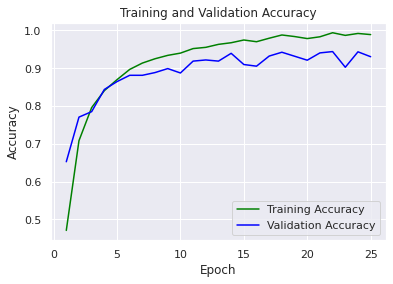

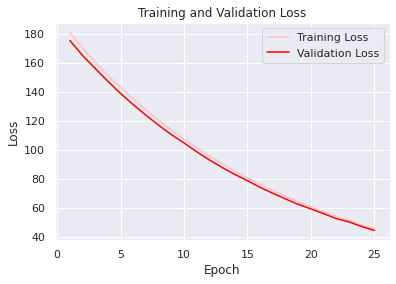

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# l2 0.05

In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.05))) 
model.add(layers.Activation(activations.relu))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.05)))
model.add(layers.Activation(activations.relu))


# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.05) ))
model.add(layers.Activation(activations.relu))


# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_65 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_66 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_74 (Conv2D)           (N

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="lr005.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False) 

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 46s 322ms/step - loss: 814.5731 - accuracy: 0.4793 - val_loss: 702.4761 - val_accuracy: 0.6851
Epoch 2/25
143/143 [==============================] - 46s 319ms/step - loss: 610.9018 - accuracy: 0.7213 - val_loss: 526.6138 - val_accuracy: 0.7663
Epoch 3/25
143/143 [==============================] - 45s 317ms/step - loss: 457.7722 - accuracy: 0.7812 - val_loss: 394.3101 - val_accuracy: 0.8239
Epoch 4/25
143/143 [==============================] - 45s 318ms/step - loss: 343.0845 - accuracy: 0.8163 - val_loss: 295.6449 - val_accuracy: 0.8410
Epoch 5/25
143/143 [==============================] - 46s 319ms/step - loss: 257.1482 - accuracy: 0.8440 - val_loss: 221.5558 - val_accuracy: 0.8553
Epoch 6/25
143/143 [==============================] - 45s 317ms/step - loss: 192.7971 - accuracy: 0.8577 - val_loss: 166.1181 - val_accuracy: 0.8078
Epoch 7/25
143/143 [==============================] - 46s 319ms/step - loss: 144.5875 - accuracy: 0.8623 -

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 90.6654953956604


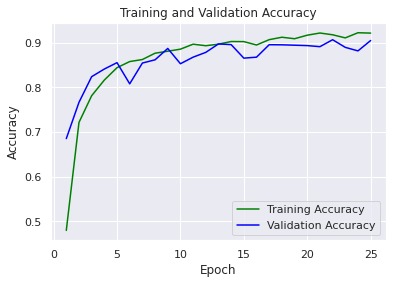

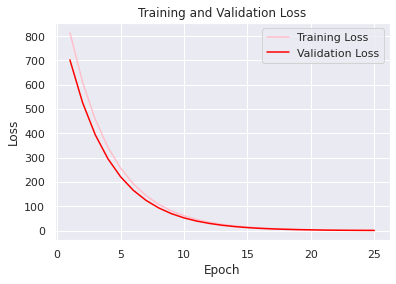

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# l2 0.001

In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.001))) 
model.add(layers.Activation(activations.relu))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation(activations.relu))


# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.001) ))
model.add(layers.Activation(activations.relu))


# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_73 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_74 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_79 (Conv2D)           (N

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="lr0001.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:

TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 46s 322ms/step - loss: 19.8627 - accuracy: 0.4828 - val_loss: 19.4081 - val_accuracy: 0.6479
Epoch 2/25
143/143 [==============================] - 45s 313ms/step - loss: 19.0071 - accuracy: 0.7384 - val_loss: 18.6749 - val_accuracy: 0.7784
Epoch 3/25
143/143 [==============================] - 44s 306ms/step - loss: 18.6987 - accuracy: 0.8027 - val_loss: 18.8897 - val_accuracy: 0.7450
Epoch 4/25
143/143 [==============================] - 43s 301ms/step - loss: 18.5021 - accuracy: 0.8342 - val_loss: 18.4711 - val_accuracy: 0.8583
Epoch 5/25
143/143 [==============================] - 43s 299ms/step - loss: 18.2792 - accuracy: 0.8787 - val_loss: 18.3665 - val_accuracy: 0.8737
Epoch 6/25
143/143 [==============================] - 42s 296ms/step - loss: 18.1210 - accuracy: 0.8965 - val_loss: 18.2435 - val_accuracy: 0.8709
Epoch 7/25
143/143 [==============================] - 43s 299ms/step - loss: 17.9695 - accuracy: 0.9161 - val_loss: 17

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 95.21194696426392


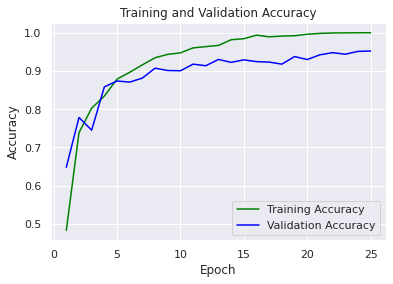

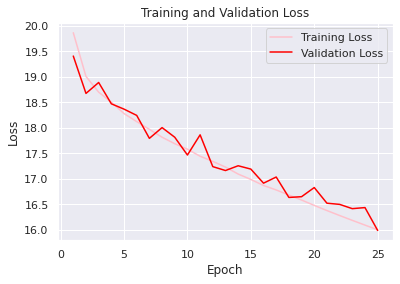

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# l2 0.0001

In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001))) 
model.add(layers.Activation(activations.relu))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Activation(activations.relu))


# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001) ))
model.add(layers.Activation(activations.relu))


# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_81 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_82 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_84 (Conv2D)           (N

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="lr00001.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  


In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)


Epoch 1/25
143/143 [==============================] - 43s 304ms/step - loss: 3.3048 - accuracy: 0.5002 - val_loss: 2.7454 - val_accuracy: 0.6971
Epoch 2/25
143/143 [==============================] - 43s 301ms/step - loss: 2.6669 - accuracy: 0.7124 - val_loss: 2.3690 - val_accuracy: 0.7138
Epoch 3/25
143/143 [==============================] - 43s 300ms/step - loss: 2.4296 - accuracy: 0.7914 - val_loss: 2.2926 - val_accuracy: 0.7845
Epoch 4/25
143/143 [==============================] - 43s 298ms/step - loss: 2.3119 - accuracy: 0.8364 - val_loss: 2.1371 - val_accuracy: 0.8643
Epoch 5/25
143/143 [==============================] - 42s 297ms/step - loss: 2.2003 - accuracy: 0.8713 - val_loss: 2.2594 - val_accuracy: 0.8788
Epoch 6/25
143/143 [==============================] - 42s 297ms/step - loss: 2.1231 - accuracy: 0.8998 - val_loss: 2.2162 - val_accuracy: 0.8908
Epoch 7/25
143/143 [==============================] - 42s 297ms/step - loss: 2.0936 - accuracy: 0.9099 - val_loss: 2.3143 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 95.36569118499756


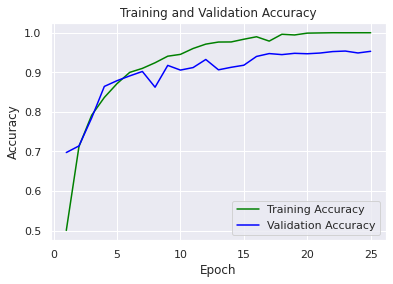

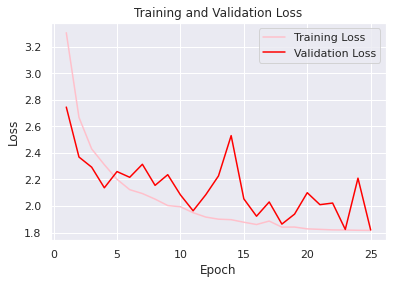

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# l2 (0.001) + data aug

In [0]:
# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(
rescale = 1./255,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

#train_gen = ImageDataGenerator(rescale = 1./255)
valid_gen = ImageDataGenerator(rescale = 1./255)

In [0]:
TARGET_SIZE = (227,227)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42

#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)

valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [0]:
 
# Initializing the CNN based AlexNet
model = Sequential()
 
#valid:zero padding, same:keep same dimensionality by add padding
 
# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
 
# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))
 
# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
 
# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))
 
# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
 
# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
 
# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
 
# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))
 
 
# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())
 
# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.001))) 
model.add(layers.Activation(activations.relu))
 
# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation(activations.relu))
 
 
# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.001) ))
model.add(layers.Activation(activations.relu))
 
 
# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))
 
 
 
print("[INFO]: Model Summary")
 
model.summary()

[INFO]: Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (No

In [0]:
from keras.callbacks import CSVLogger
from keras.optimizers import SGD
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9
 
# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
#Log callback
filepath="lr0-001_data_aug.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 223s 2s/step - loss: 20.2656 - accuracy: 0.3226 - val_loss: 19.4652 - val_accuracy: 0.5404
Epoch 2/25
143/143 [==============================] - 221s 2s/step - loss: 19.5329 - accuracy: 0.5561 - val_loss: 19.3234 - val_accuracy: 0.6141
Epoch 3/25
143/143 [==============================] - 217s 2s/step - loss: 19.1014 - accuracy: 0.6604 - val_loss: 18.9196 - val_accuracy: 0.7213
Epoch 4/25
143/143 [==============================] - 217s 2s/step - loss: 18.7564 - accuracy: 0.7488 - val_loss: 18.6406 - val_accuracy: 0.7050
Epoch 5/25
143/143 [==============================] - 216s 2s/step - loss: 18.6289 - accuracy: 0.7571 - val_loss: 18.4814 - val_accuracy: 0.7924
Epoch 6/25
143/143 [==============================] - 213s 1s/step - loss: 18.4069 - accuracy: 0.7979 - val_loss: 18.7642 - val_accuracy: 0.7134
Epoch 7/25
143/143 [==============================] - 211s 1s/step - loss: 18.2234 - accuracy: 0.8271 - val_loss: 18.6455 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 93.25719475746155


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


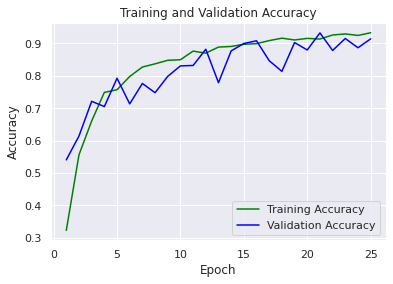

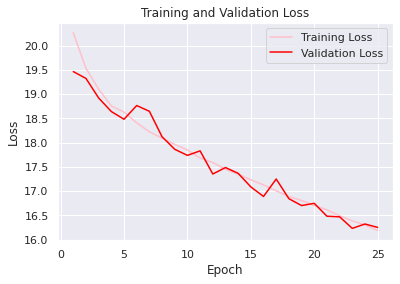

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# LN before RELU

In [0]:
# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(rescale = 1./255)
valid_gen = ImageDataGenerator(rescale = 1./255)

In [0]:
TARGET_SIZE = (227,227)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42
 
#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)
 
valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
tf.keras.layers.LayerNormalization()
model.add(layers.Activation(activations.relu))

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
tf.keras.layers.LayerNormalization()
model.add(layers.Activation(activations.relu))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
tf.keras.layers.LayerNormalization()
model.add(layers.Activation(activations.relu))

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
tf.keras.layers.LayerNormalization()
model.add(layers.Activation(activations.relu))

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
tf.keras.layers.LayerNormalization()
model.add(layers.Activation(activations.relu))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001))) 
tf.keras.layers.LayerNormalization()
model.add(layers.Activation(activations.relu))


# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
tf.keras.layers.LayerNormalization()
model.add(layers.Activation(activations.relu))



# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001) ))
tf.keras.layers.LayerNormalization()
model.add(layers.Activation(activations.relu))


# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_9 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_10 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="lnbefore_relu.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)


Epoch 1/25
143/143 [==============================] - 47s 330ms/step - loss: 3.4482 - accuracy: 0.4464 - val_loss: 2.8650 - val_accuracy: 0.6707
Epoch 2/25
143/143 [==============================] - 47s 327ms/step - loss: 2.6634 - accuracy: 0.7180 - val_loss: 2.5564 - val_accuracy: 0.7417
Epoch 3/25
143/143 [==============================] - 46s 323ms/step - loss: 2.4446 - accuracy: 0.7888 - val_loss: 2.2801 - val_accuracy: 0.8170
Epoch 4/25
143/143 [==============================] - 46s 321ms/step - loss: 2.3274 - accuracy: 0.8285 - val_loss: 2.3121 - val_accuracy: 0.8445
Epoch 5/25
143/143 [==============================] - 46s 319ms/step - loss: 2.2259 - accuracy: 0.8655 - val_loss: 2.2052 - val_accuracy: 0.8634
Epoch 6/25
143/143 [==============================] - 49s 340ms/step - loss: 2.1450 - accuracy: 0.8930 - val_loss: 2.3645 - val_accuracy: 0.7973
Epoch 7/25
143/143 [==============================] - 46s 320ms/step - loss: 2.0989 - accuracy: 0.9084 - val_loss: 2.0356 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 94.97035145759583


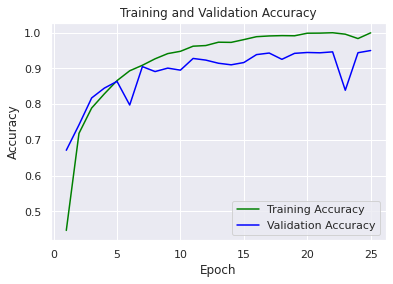

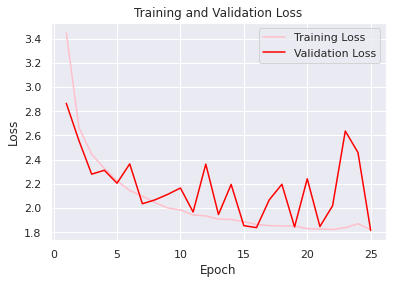

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# LN after RELU

In [0]:
 
# Initializing the CNN based AlexNet
model = Sequential()
 
#valid:zero padding, same:keep same dimensionality by add padding
 
# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.LayerNormalization()
 
# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))
 
# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.LayerNormalization()
 
# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))
 
# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.LayerNormalization()
 
# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.LayerNormalization()
 
# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.LayerNormalization()
 
# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))
 
 
# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())
 
# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001))) 
model.add(layers.Activation(activations.relu))
tf.keras.layers.LayerNormalization()
 
# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Activation(activations.relu))
tf.keras.layers.LayerNormalization()
 
 
# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001) ))
model.add(layers.Activation(activations.relu))
tf.keras.layers.LayerNormalization()
 
# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))
 
 
 
print("[INFO]: Model Summary")
 
model.summary()

[INFO]: Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9
 
# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
#Log callback
filepath="lnafter_relu.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25
 
STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE
 
#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 49s 340ms/step - loss: 3.4206 - accuracy: 0.4657 - val_loss: 2.5802 - val_accuracy: 0.6921
Epoch 2/25
143/143 [==============================] - 43s 300ms/step - loss: 2.6495 - accuracy: 0.7203 - val_loss: 2.4392 - val_accuracy: 0.7821
Epoch 3/25
143/143 [==============================] - 42s 296ms/step - loss: 2.4591 - accuracy: 0.7871 - val_loss: 2.2389 - val_accuracy: 0.8212
Epoch 4/25
143/143 [==============================] - 43s 298ms/step - loss: 2.2858 - accuracy: 0.8449 - val_loss: 2.2259 - val_accuracy: 0.8166
Epoch 5/25
143/143 [==============================] - 43s 299ms/step - loss: 2.2030 - accuracy: 0.8752 - val_loss: 2.1571 - val_accuracy: 0.8654
Epoch 6/25
143/143 [==============================] - 43s 300ms/step - loss: 2.1397 - accuracy: 0.8940 - val_loss: 2.3904 - val_accuracy: 0.8741
Epoch 7/25
143/143 [==============================] - 43s 300ms/step - loss: 2.0883 - accuracy: 0.9147 - val_loss: 2.2673 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 95.05820274353027


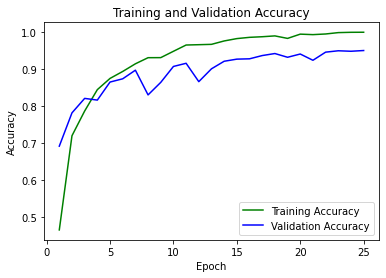

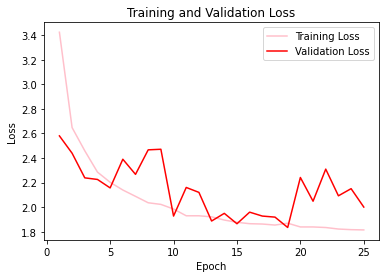

In [0]:
#Plot Accuracy and Loss
 
import matplotlib.pyplot as plt
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
 
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
 
plt.figure()
 
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

# BN before RELU

In [0]:
 
# Initializing the CNN based AlexNet
model = Sequential()
 
#valid:zero padding, same:keep same dimensionality by add padding
 
# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
tf.keras.layers.BatchNormalization()
model.add(layers.Activation(activations.relu))
 
# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))
 
# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
tf.keras.layers.BatchNormalization()
model.add(layers.Activation(activations.relu))
 
# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))
 
# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
tf.keras.layers.BatchNormalization()
model.add(layers.Activation(activations.relu))
 
# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
tf.keras.layers.BatchNormalization()
model.add(layers.Activation(activations.relu))
 
# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
tf.keras.layers.BatchNormalization()
model.add(layers.Activation(activations.relu))
 
# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))
 
 
# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())
 
# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001))) 
tf.keras.layers.BatchNormalization()
model.add(layers.Activation(activations.relu))
 
 
# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
tf.keras.layers.BatchNormalization()
model.add(layers.Activation(activations.relu))
 
 
 
# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001) ))
tf.keras.layers.BatchNormalization()
model.add(layers.Activation(activations.relu))
 
 
# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))
 
 
 
print("[INFO]: Model Summary")
 
model.summary()

[INFO]: Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9
 
# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
#Log callback
filepath="bnbefore_relu.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25
 
STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE
 
#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 49s 341ms/step - loss: 3.6052 - accuracy: 0.4038 - val_loss: 3.0626 - val_accuracy: 0.5719
Epoch 2/25
143/143 [==============================] - 42s 297ms/step - loss: 2.7323 - accuracy: 0.6931 - val_loss: 2.6601 - val_accuracy: 0.7413
Epoch 3/25
143/143 [==============================] - 42s 296ms/step - loss: 2.4778 - accuracy: 0.7773 - val_loss: 2.2319 - val_accuracy: 0.8085
Epoch 4/25
143/143 [==============================] - 42s 297ms/step - loss: 2.3224 - accuracy: 0.8332 - val_loss: 2.5655 - val_accuracy: 0.8318
Epoch 5/25
143/143 [==============================] - 43s 300ms/step - loss: 2.2381 - accuracy: 0.8619 - val_loss: 2.4819 - val_accuracy: 0.8124
Epoch 6/25
143/143 [==============================] - 42s 295ms/step - loss: 2.1814 - accuracy: 0.8791 - val_loss: 2.1957 - val_accuracy: 0.8862
Epoch 7/25
143/143 [==============================] - 42s 295ms/step - loss: 2.1047 - accuracy: 0.9074 - val_loss: 2.3825 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 95.34372687339783


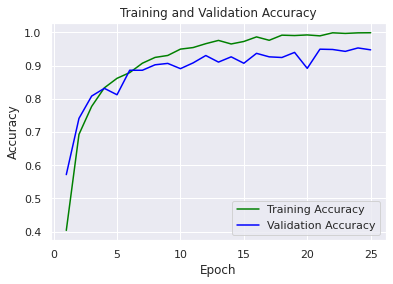

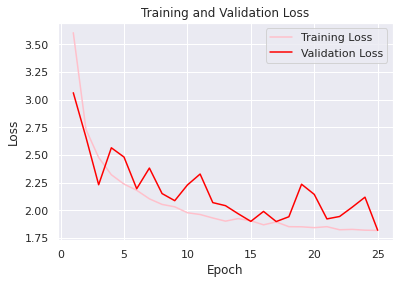

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# BN after RELU

In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001))) 
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()


# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001) ))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_9 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_10 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="bnafter_relulog"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 42s 297ms/step - loss: 3.2758 - accuracy: 0.5042 - val_loss: 2.9467 - val_accuracy: 0.6444
Epoch 2/25
143/143 [==============================] - 43s 298ms/step - loss: 2.5920 - accuracy: 0.7401 - val_loss: 2.6611 - val_accuracy: 0.7863
Epoch 3/25
143/143 [==============================] - 42s 296ms/step - loss: 2.3645 - accuracy: 0.8159 - val_loss: 2.2217 - val_accuracy: 0.8212
Epoch 4/25
143/143 [==============================] - 43s 298ms/step - loss: 2.2585 - accuracy: 0.8560 - val_loss: 2.2602 - val_accuracy: 0.8214
Epoch 5/25
143/143 [==============================] - 42s 295ms/step - loss: 2.2106 - accuracy: 0.8687 - val_loss: 2.4020 - val_accuracy: 0.8621
Epoch 6/25
143/143 [==============================] - 42s 297ms/step - loss: 2.1186 - accuracy: 0.9034 - val_loss: 2.2829 - val_accuracy: 0.8794
Epoch 7/25
143/143 [==============================] - 42s 295ms/step - loss: 2.0617 - accuracy: 0.9207 - val_loss: 2.2467 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 95.73907256126404


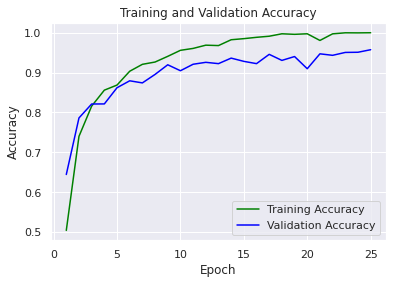

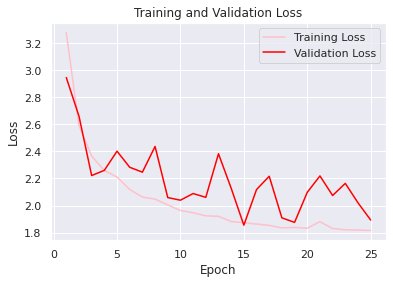

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 50 Epoch

In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001))) 
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()


# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001) ))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_17 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_18 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="50epoch.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 50

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/50
143/143 [==============================] - 42s 295ms/step - loss: 3.5137 - accuracy: 0.4355 - val_loss: 3.0870 - val_accuracy: 0.6774
Epoch 2/50
143/143 [==============================] - 42s 295ms/step - loss: 2.7100 - accuracy: 0.6982 - val_loss: 2.4970 - val_accuracy: 0.7430
Epoch 3/50
143/143 [==============================] - 42s 295ms/step - loss: 2.4625 - accuracy: 0.7857 - val_loss: 2.3188 - val_accuracy: 0.7694
Epoch 4/50
143/143 [==============================] - 43s 297ms/step - loss: 2.3492 - accuracy: 0.8234 - val_loss: 2.6155 - val_accuracy: 0.7810
Epoch 5/50
143/143 [==============================] - 43s 299ms/step - loss: 2.2326 - accuracy: 0.8611 - val_loss: 2.4291 - val_accuracy: 0.8449
Epoch 6/50
143/143 [==============================] - 42s 296ms/step - loss: 2.1762 - accuracy: 0.8802 - val_loss: 2.0450 - val_accuracy: 0.8834
Epoch 7/50
143/143 [==============================] - 42s 295ms/step - loss: 2.1100 - accuracy: 0.9037 - val_loss: 2.3837 - val_ac

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)


[INFO] Best Validation Accuracy: % 95.21194696426392


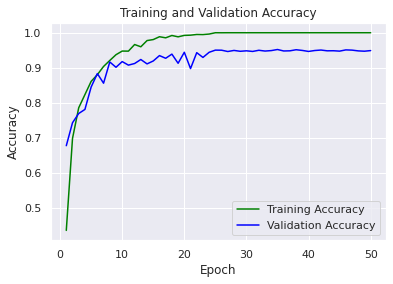

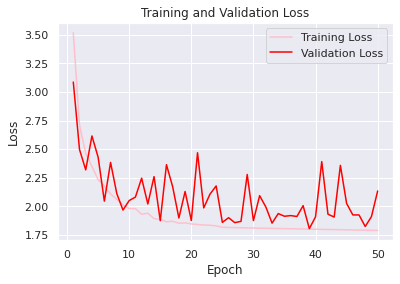

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 50 Epoch + Data Aug

In [0]:
# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(
rescale = 1./255,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

#train_gen = ImageDataGenerator(rescale = 1./255)
valid_gen = ImageDataGenerator(rescale = 1./255)


In [0]:
TARGET_SIZE = (227,227)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42

#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)

valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)


Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001))) 
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()


# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001) ))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="50epoch_dataaug.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 50

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/50
143/143 [==============================] - 201s 1s/step - loss: 3.6338 - accuracy: 0.3663 - val_loss: 3.0243 - val_accuracy: 0.4716
Epoch 2/50
143/143 [==============================] - 201s 1s/step - loss: 3.0061 - accuracy: 0.6006 - val_loss: 3.3211 - val_accuracy: 0.5798
Epoch 3/50
143/143 [==============================] - 200s 1s/step - loss: 2.7355 - accuracy: 0.6882 - val_loss: 2.5883 - val_accuracy: 0.7380
Epoch 4/50
143/143 [==============================] - 200s 1s/step - loss: 2.5618 - accuracy: 0.7492 - val_loss: 2.4776 - val_accuracy: 0.7898
Epoch 5/50
143/143 [==============================] - 199s 1s/step - loss: 2.4772 - accuracy: 0.7768 - val_loss: 2.3822 - val_accuracy: 0.7685
Epoch 6/50
143/143 [==============================] - 198s 1s/step - loss: 2.3790 - accuracy: 0.8092 - val_loss: 2.8849 - val_accuracy: 0.7610
Epoch 7/50
143/143 [==============================] - 199s 1s/step - loss: 2.3202 - accuracy: 0.8297 - val_loss: 2.2582 - val_accuracy: 0.8544

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 95.5194354057312


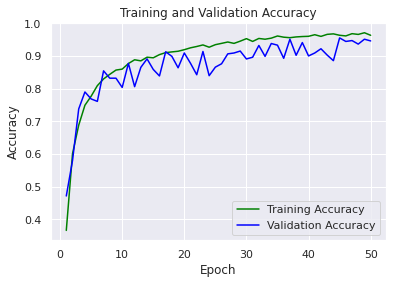

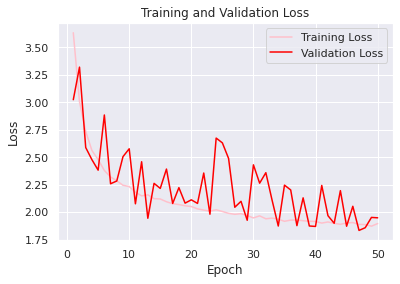

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 100 Epoch + Data Aug

In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001))) 
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()


# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001) ))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_33 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_34 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="50epoch.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 100

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/100
143/143 [==============================] - 204s 1s/step - loss: 3.8102 - accuracy: 0.3114 - val_loss: 2.9195 - val_accuracy: 0.5155
Epoch 2/100
143/143 [==============================] - 204s 1s/step - loss: 3.1454 - accuracy: 0.5459 - val_loss: 2.8303 - val_accuracy: 0.5465
Epoch 3/100
143/143 [==============================] - 205s 1s/step - loss: 2.8058 - accuracy: 0.6613 - val_loss: 3.3140 - val_accuracy: 0.6282
Epoch 4/100
143/143 [==============================] - 205s 1s/step - loss: 2.6423 - accuracy: 0.7206 - val_loss: 2.3829 - val_accuracy: 0.7450
Epoch 5/100
143/143 [==============================] - 202s 1s/step - loss: 2.4796 - accuracy: 0.7754 - val_loss: 2.6812 - val_accuracy: 0.7408
Epoch 6/100
143/143 [==============================] - 201s 1s/step - loss: 2.4248 - accuracy: 0.7915 - val_loss: 2.3506 - val_accuracy: 0.8526
Epoch 7/100
143/143 [==============================] - 204s 1s/step - loss: 2.3460 - accuracy: 0.8194 - val_loss: 3.2332 - val_accuracy:

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 97.78168201446533


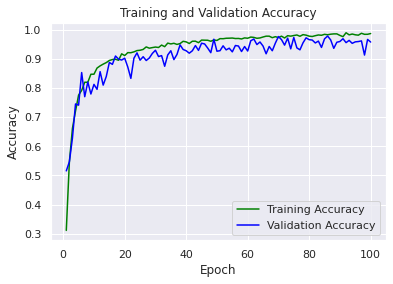

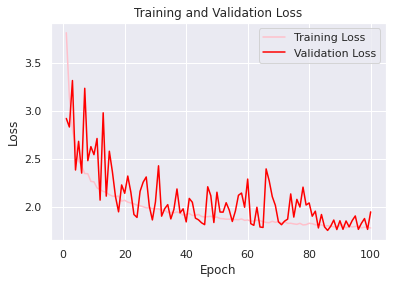

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# L2 yerine Dropout +  100 Epoch 

In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform')) 
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()
model.add(Dropout(0.2))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()
model.add(Dropout(0.2))


# 3rd Fully Connected Layer
model.add(Dense(units = 1000,  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()
model.add(Dropout(0.2))

# 4td Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_41 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_42 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="50epoch.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 100

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/100
143/143 [==============================] - 209s 1s/step - loss: 2.1156 - accuracy: 0.2303 - val_loss: 1.5314 - val_accuracy: 0.4554
Epoch 2/100
143/143 [==============================] - 202s 1s/step - loss: 1.5489 - accuracy: 0.4582 - val_loss: 1.1160 - val_accuracy: 0.5473
Epoch 3/100
143/143 [==============================] - 200s 1s/step - loss: 1.1712 - accuracy: 0.5958 - val_loss: 1.1451 - val_accuracy: 0.5746
Epoch 4/100
143/143 [==============================] - 199s 1s/step - loss: 0.9690 - accuracy: 0.6608 - val_loss: 0.8372 - val_accuracy: 0.6771
Epoch 5/100
143/143 [==============================] - 198s 1s/step - loss: 0.8243 - accuracy: 0.7060 - val_loss: 1.4039 - val_accuracy: 0.7233
Epoch 6/100
143/143 [==============================] - 197s 1s/step - loss: 0.7197 - accuracy: 0.7451 - val_loss: 0.6567 - val_accuracy: 0.7283
Epoch 7/100
143/143 [==============================] - 195s 1s/step - loss: 0.6837 - accuracy: 0.7579 - val_loss: 0.6957 - val_accuracy:

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 97.97935485839844


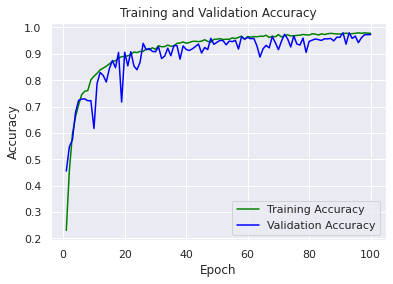

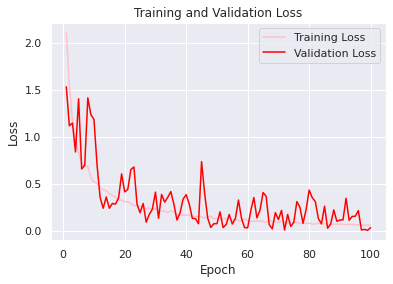

In [0]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Without 1000 dense layer

In [0]:

# Initializing the CNN based AlexNet
model = Sequential()

#valid:zero padding, same:keep same dimensionality by add padding

# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

# Convolution Step 2
model.add(Convolution2D(256, 5, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))

# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='same',  kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='same', kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))


# Flattening Step --> 6*6*256 = 9216
model.add(Flatten())

# Full Connection Steps
# 1st Fully Connected Layer
model.add(Dense(units = 4096,  kernel_initializer='he_uniform')) 
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()
model.add(Dropout(0.2))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096,kernel_initializer='he_uniform'))
model.add(layers.Activation(activations.relu))
tf.keras.layers.BatchNormalization()
model.add(Dropout(0.2))




# 3th Fully Connected Layer
model.add(Dense(units = 10, activation = 'softmax'))



print("[INFO]: Model Summary")

model.summary()

[INFO]: Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (No

In [0]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# compile model
opt = SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Log callback
filepath="50epoch.log"
path = F"{filepath}" 
csv_logger = CSVLogger(path, separator=',', append=False)  

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 100

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/100
143/143 [==============================] - 49s 340ms/step - loss: 1.8284 - accuracy: 0.3671 - val_loss: 1.2865 - val_accuracy: 0.6641
Epoch 2/100
143/143 [==============================] - 43s 302ms/step - loss: 0.9457 - accuracy: 0.6766 - val_loss: 0.8636 - val_accuracy: 0.7591
Epoch 3/100
143/143 [==============================] - 43s 298ms/step - loss: 0.7122 - accuracy: 0.7554 - val_loss: 0.3037 - val_accuracy: 0.7887
Epoch 4/100
143/143 [==============================] - 43s 299ms/step - loss: 0.5873 - accuracy: 0.7991 - val_loss: 0.6500 - val_accuracy: 0.8460
Epoch 5/100
143/143 [==============================] - 42s 297ms/step - loss: 0.4903 - accuracy: 0.8316 - val_loss: 0.2993 - val_accuracy: 0.8460
Epoch 6/100
143/143 [==============================] - 42s 296ms/step - loss: 0.4313 - accuracy: 0.8496 - val_loss: 0.6430 - val_accuracy: 0.8480
Epoch 7/100
143/143 [==============================] - 43s 299ms/step - loss: 0.3761 - accuracy: 0.8713 - val_loss: 0.2593 -

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 96.72743082046509


# 25 epoch +  dropout + data aug 

In [0]:
TRAINING_NUM = train_data.samples #or train_data.n
VALID_NUM = valid_data.samples
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

#Train Model
history = model.fit_generator(generator = train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_data,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[csv_logger],
                    epochs = EPOCHS
)

Epoch 1/25
143/143 [==============================] - 243s 2s/step - loss: 3.7134 - accuracy: 0.3411 - val_loss: 3.5986 - val_accuracy: 0.4034
Epoch 2/25
143/143 [==============================] - 239s 2s/step - loss: 3.0383 - accuracy: 0.5881 - val_loss: 3.0178 - val_accuracy: 0.6060
Epoch 3/25
143/143 [==============================] - 238s 2s/step - loss: 2.7789 - accuracy: 0.6725 - val_loss: 2.7400 - val_accuracy: 0.6565
Epoch 4/25
143/143 [==============================] - 236s 2s/step - loss: 2.5752 - accuracy: 0.7453 - val_loss: 2.6254 - val_accuracy: 0.7417
Epoch 5/25
143/143 [==============================] - 232s 2s/step - loss: 2.5082 - accuracy: 0.7673 - val_loss: 2.4835 - val_accuracy: 0.7902
Epoch 6/25
143/143 [==============================] - 230s 2s/step - loss: 2.3813 - accuracy: 0.8063 - val_loss: 2.6829 - val_accuracy: 0.7450
Epoch 7/25
143/143 [==============================] - 232s 2s/step - loss: 2.3381 - accuracy: 0.8229 - val_loss: 2.5328 - val_accuracy: 0.7971

In [0]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 92.9057776927948
